In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import os

In [5]:
# Set paths
data_dir = 'data'
img_height, img_width = 224, 224
batch_size = 32

# Data augmentation and loading
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

Found 3200 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [7]:
# Use MobileNetV2 for transfer learning
base_model = MobileNetV2(input_shape=(img_height, img_width, 3),
                        include_top=False,
                        weights='imagenet')
base_model.trainable = False

# Create model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [9]:
# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 32s 309ms/step - accuracy: 0.9334 - loss: 0.1426 - val_accuracy: 0.9325 - val_loss: 0.1777
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 310ms/step - accuracy: 0.9994 - loss: 0.0054 - val_accuracy: 0.8788 - val_loss: 0.3296
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 33s 330ms/step - accuracy: 0.9996 - loss: 0.0033 - val_accuracy: 0.9775 - val_loss: 0.0653
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 35s 351ms/step - accuracy: 0.9962 - loss: 0.0101 - val_accuracy: 0.9737 - val_loss: 0.0761
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 36s 357ms/step - accuracy: 0.9993 - loss: 0.0026 - val_accuracy: 0.9812 - val_loss: 0.0466
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 36s 364ms/step - accuracy: 0.9987 - loss: 0.0043 - val_accuracy: 0.8763 - val_loss: 0.3989
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 37s 371ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 0.9625 - val_loss: 0.1416
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 38s 376ms/step - accuracy: 0.9999 - loss: 0

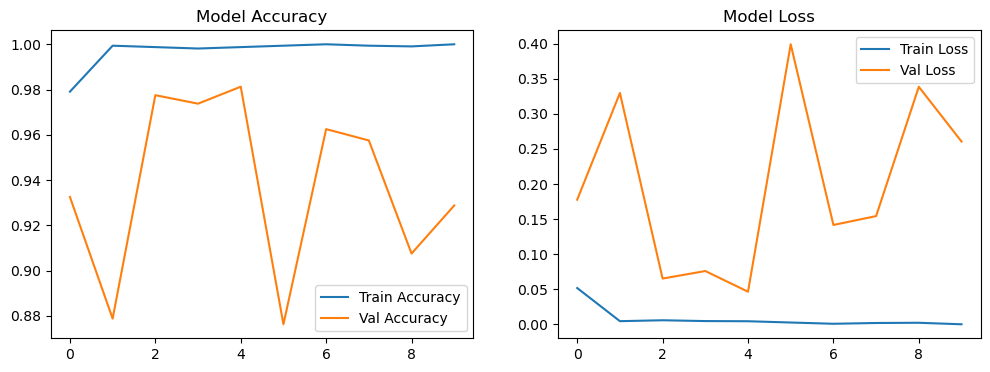

25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 286ms/step


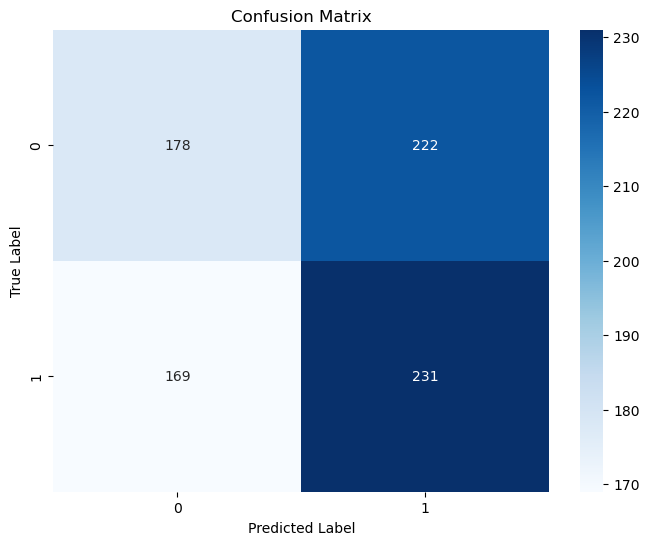

              precision    recall  f1-score   support

       Awake       0.51      0.45      0.48       400
      Drowsy       0.51      0.58      0.54       400

    accuracy                           0.51       800
   macro avg       0.51      0.51      0.51       800
weighted avg       0.51      0.51      0.51       800


Model Accuracy: 51.12%
Model saved successfully!


In [11]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.legend()
plt.savefig('results/training_history.png')
plt.show()

# Get predictions for confusion matrix
val_generator.reset()
predictions = model.predict(val_generator)
y_pred = (predictions > 0.5).astype(int).flatten()
y_true = val_generator.classes

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.savefig('results/confusion_matrix.png')
plt.show()

# Classification Report
print(classification_report(y_true, y_pred, target_names=['Awake', 'Drowsy']))

# Print accuracy
accuracy = np.sum(y_pred == y_true) / len(y_true)
print(f"\nModel Accuracy: {accuracy * 100:.2f}%")

# Save model
model.save('models/drowsiness_model.h5')
print("Model saved successfully!")